In [55]:
#code reference https://github.com/jeffheaton/t81_558_deep_learning/blob/b2fffd1b89d3d37adf4c9d82c4cbc991f871f3a3/t81_558_class_10_2_lstm.ipynb
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt

import numpy as np

def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    
PATH = "./HW5-dataset/"
    
filename = os.path.join(PATH,"AC-v3.csv")
names = ['Id','Time' 'temp']
df = pd.read_csv(filename,sep=',',infer_datetime_format=True,usecols=[0,2,5],
                 index_col=False)
df['Time'] = pd.to_datetime(df.Time)
df["Time"]=df["Time"].dt.strftime('%Y%m%d%H%M%S')

print("Starting file:")
print(df[0:10])

print("Ending file:")
print(df[-10:])

is_r_53 =  df['Id']==53

df_r_53 = df[is_r_53]


print("Starting file:")
print(df_r_53[0:10])

print("Ending file:")
print(df_r_53[-10:])
print(df_r_53.shape)



Starting file:
    Id            Time     temp
0   10  20150924080604   29.566
1   13  20150924080605   25.602
2   11  20150924080605   27.105
3   24  20150924080608   29.308
4   53  20150924080612   24.691
5   40  20150924080617   31.915
6    3  20150924080622   29.652
7   20  20150924080627   29.308
8   54  20150924080639 -273.150
9  255  20150924080643   29.738
Ending file:
       Id            Time     temp
1202   10  20150924100315   29.652
1203   13  20150924100316   28.796
1204   11  20150924100316   29.137
1205   24  20150924100318   29.394
1206   53  20150924100322   25.188
1207   40  20150924100328   32.004
1208    3  20150924100333   29.652
1209   20  20150924100338   29.308
1210   54  20150924100350 -273.150
1211  255  20150924100356   29.824
Starting file:
    Id            Time    temp
4   53  20150924080612  24.691
14  53  20150924080711  23.703
24  53  20150924080809  23.456
34  53  20150924080907  23.128
44  53  20150924081008  23.210
54  53  20150924081105  23.210
64 

/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


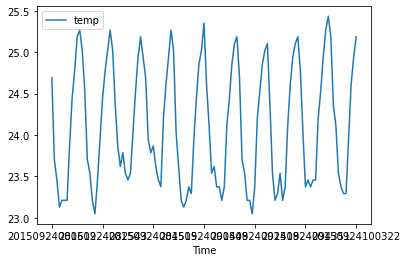

In [56]:
df_r_53.plot(x ='Time', y='temp', kind = 'line')
plt.show()

In [57]:
df_r_53_train = df_r_53[df_r_53['Time']<'20150924094000']



print("Starting file:")
print(df_r_53_train[0:10])

print("Ending file:")
print(df_r_53_train[-10:])
print(df_r_53_train.shape)



Starting file:
    Id            Time    temp
4   53  20150924080612  24.691
14  53  20150924080711  23.703
24  53  20150924080809  23.456
34  53  20150924080907  23.128
44  53  20150924081008  23.210
54  53  20150924081105  23.210
64  53  20150924081203  23.210
74  53  20150924081303  23.867
83  53  20150924081400  24.444
93  53  20150924081459  24.774
Ending file:
     Id            Time    temp
874  53  20150924093111  23.538
885  53  20150924093207  23.210
895  53  20150924093307  23.292
905  53  20150924093403  23.538
915  53  20150924093503  23.210
925  53  20150924093602  23.374
935  53  20150924093700  24.114
945  53  20150924093759  24.609
955  53  20150924093857  24.939
965  53  20150924093958  25.105
(97, 3)


In [58]:
df_r_53_test = df_r_53[df_r_53['Time']>='20150924094000']

print("Starting file:")
print(df_r_53_test[0:10])

print("Ending file:")
print(df_r_53_test[-10:])
print(df_r_53_test.shape)


Starting file:
      Id            Time    temp
975   53  20150924094055  25.188
985   53  20150924094154  24.774
996   53  20150924094251  24.032
1006  53  20150924094351  23.374
1016  53  20150924094448  23.456
1026  53  20150924094547  23.374
1036  53  20150924094646  23.456
1046  53  20150924094744  23.456
1056  53  20150924094844  24.196
1066  53  20150924094942  24.526
Ending file:
      Id            Time    temp
1116  53  20150924095435  24.361
1126  53  20150924095533  24.114
1136  53  20150924095631  23.538
1146  53  20150924095730  23.374
1156  53  20150924095830  23.292
1166  53  20150924095928  23.292
1176  53  20150924100026  23.949
1186  53  20150924100124  24.609
1196  53  20150924100222  24.939
1206  53  20150924100322  25.188
(24, 3)


In [59]:
spots_train = df_r_53_train['temp'].tolist()

spots_test = df_r_53_test['temp'].tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))

Training set has 97 observations.
Test set has 24 observations.


In [61]:

SEQUENCE_SIZE = 1
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (96, 1, 1)
Shape of test set: (23, 1, 1)


In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

print('Build model...')
model = Sequential()
model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0,input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
print('Train...')

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Build model...
Train...
Train on 96 samples, validate on 23 samples
Epoch 1/1000
